In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Square lattice:

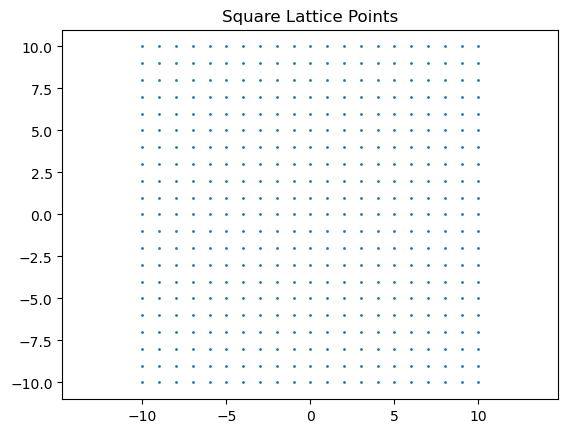

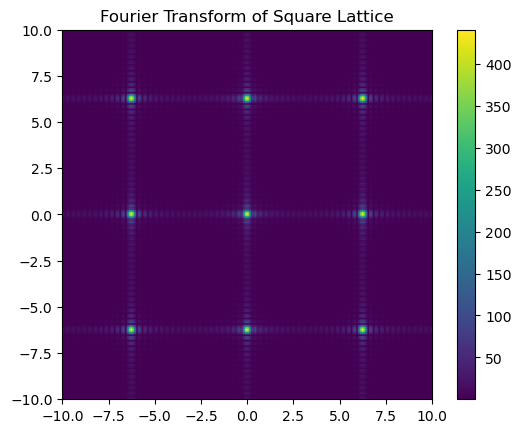

In [7]:
# Function to generate square lattice points
def generate_square_lattice(n):
    points = []
    for i in range(-n, n+1):
        for j in range(-n, n+1):
            points.append([i, j])
    return np.array(points)

# Generate Penrose tiling points
n = 10
points = generate_square_lattice(n)

# Plot the points
plt.scatter(points[:, 0], points[:, 1], s=1)
plt.title('Square Lattice Points')
plt.axis('equal')
plt.show()

# Compute the Fourier transform
kx = np.linspace(-10, 10, 200)
ky = np.linspace(-10, 10, 200)
KX, KY = np.meshgrid(kx, ky)
FT = np.zeros_like(KX, dtype=complex)

for x, y in points:
    FT += np.exp(-1j * (KX * x + KY * y))

FT_magnitude = np.abs(FT)

# Plot the Fourier transform magnitude
plt.imshow(FT_magnitude, extent=(-10, 10, -10, 10), origin='lower')
plt.title('Fourier Transform of Square Lattice')
plt.colorbar()
plt.show()

square lattice sequence

In [15]:
radii = {}
for x, y in points:
    if x == 0 and y == 0:
        continue
    r2 = x**2 + y**2
    radii[r2] = radii.get(r2, 0) + 1

# sort the radii by frequency
radii = dict(sorted(radii.items(), key=lambda x: x[0]))
radii

{1: 4,
 2: 4,
 4: 4,
 5: 8,
 8: 4,
 9: 4,
 10: 8,
 13: 8,
 16: 4,
 17: 8,
 18: 4,
 20: 8,
 25: 12,
 26: 8,
 29: 8,
 32: 4,
 34: 8,
 36: 4,
 37: 8,
 40: 8,
 41: 8,
 45: 8,
 49: 4,
 50: 12,
 52: 8,
 53: 8,
 58: 8,
 61: 8,
 64: 4,
 65: 16,
 68: 8,
 72: 4,
 73: 8,
 74: 8,
 80: 8,
 81: 4,
 82: 8,
 85: 16,
 89: 8,
 90: 8,
 97: 8,
 98: 4,
 100: 12,
 101: 8,
 104: 8,
 106: 8,
 109: 8,
 113: 8,
 116: 8,
 117: 8,
 125: 8,
 128: 4,
 130: 8,
 136: 8,
 145: 8,
 149: 8,
 162: 4,
 164: 8,
 181: 8,
 200: 4}

examine the property of the radii sequence

In [31]:
radii_decompose = {}
for r2 in radii:
    factors = sp.factorint(r2)
    factors_str = ' * '.join([f'{p}^{e}' for p, e in factors.items()])
    radii_decompose[r2] = factors_str
radii_decompose

{1: '',
 2: '2^1',
 4: '2^2',
 5: '5^1',
 8: '2^3',
 9: '3^2',
 10: '2^1 * 5^1',
 13: '13^1',
 16: '2^4',
 17: '17^1',
 18: '2^1 * 3^2',
 20: '2^2 * 5^1',
 25: '5^2',
 26: '2^1 * 13^1',
 29: '29^1',
 32: '2^5',
 34: '2^1 * 17^1',
 36: '2^2 * 3^2',
 37: '37^1',
 40: '2^3 * 5^1',
 41: '41^1',
 45: '3^2 * 5^1',
 49: '7^2',
 50: '2^1 * 5^2',
 52: '2^2 * 13^1',
 53: '53^1',
 58: '2^1 * 29^1',
 61: '61^1',
 64: '2^6',
 65: '5^1 * 13^1',
 68: '2^2 * 17^1',
 72: '2^3 * 3^2',
 73: '73^1',
 74: '2^1 * 37^1',
 80: '2^4 * 5^1',
 81: '3^4',
 82: '2^1 * 41^1',
 85: '5^1 * 17^1',
 89: '89^1',
 90: '2^1 * 3^2 * 5^1',
 97: '97^1',
 98: '2^1 * 7^2',
 100: '2^2 * 5^2',
 101: '101^1',
 104: '2^3 * 13^1',
 106: '2^1 * 53^1',
 109: '109^1',
 113: '113^1',
 116: '2^2 * 29^1',
 117: '3^2 * 13^1',
 125: '5^3',
 128: '2^7',
 130: '2^1 * 5^1 * 13^1',
 136: '2^3 * 17^1',
 145: '5^1 * 29^1',
 149: '149^1',
 162: '2^1 * 3^4',
 164: '2^2 * 41^1',
 181: '181^1',
 200: '2^3 * 5^2'}

In [23]:
eta_square = sp.symbols('eta_\square')
eta_square = {k: v//4 for k, v in radii.items()}
eta_square

{1: 1,
 2: 1,
 4: 1,
 5: 2,
 8: 1,
 9: 1,
 10: 2,
 13: 2,
 16: 1,
 17: 2,
 18: 1,
 20: 2,
 25: 3,
 26: 2,
 29: 2,
 32: 1,
 34: 2,
 36: 1,
 37: 2,
 40: 2,
 41: 2,
 45: 2,
 49: 1,
 50: 3,
 52: 2,
 53: 2,
 58: 2,
 61: 2,
 64: 1,
 65: 4,
 68: 2,
 72: 1,
 73: 2,
 74: 2,
 80: 2,
 81: 1,
 82: 2,
 85: 4,
 89: 2,
 90: 2,
 97: 2,
 98: 1,
 100: 3,
 101: 2,
 104: 2,
 106: 2,
 109: 2,
 113: 2,
 116: 2,
 117: 2,
 125: 2,
 128: 1,
 130: 2,
 136: 2,
 145: 2,
 149: 2,
 162: 1,
 164: 2,
 181: 2,
 200: 1}

In [33]:
from sympy import symbols, Sum, exp, pi, oo, sqrt

# Define the symbols
x, y, s = symbols('x y s')

# Define the function
f = exp(-pi * (x**2 + y**2) / s)

# Compute the Poisson resummation
poisson_resummation = Sum(f, (x, -oo, oo), (y, -oo, oo)).doit()

# Simplify the result
poisson_resummation = poisson_resummation.simplify()

poisson_resummation
# Print the result
# print(poisson_resummation)

Sum(exp(-pi*x**2/s)*exp(-pi*y**2/s), (x, -oo, oo), (y, -oo, oo))

The Poisson Summation Formula (PSF) 

For a general lattice in $ \mathbb{R}^d $ with a lattice basis $ \{a_1, a_2, \dots, a_d\} $, the formula becomes:
$ \sum_{n \in \mathbb{Z}^d} f(a_1 n_1 + \cdots + a_d n_d) = \frac{1}{|\det(A)|} \sum_{k \in \mathbb{Z}^d} \hat{f}(2\pi A^{-T} k) $
where $ A $ is the matrix with columns $ a_1, a_2, \dots, a_d $ and $ A^{-T} $ is the inverse of the transpose of $ A $.